In [5]:

from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=22
sns.set_context("poster") #paper, notebook, talk, poster
sns.set(rc={"figure.figsize": (8.,4.)}) #Tamaño de las figuras, ancho y alto
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_palette("colorblind") # deep, muted, pastel, bright, dark, colorblind
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [4]:
import pandas as pd

# Leer el archivo
df = pd.read_csv("/mnt/c/Users/danie/OneDrive/Desktop/Proyectos/Proyecto_PRIMOR/Data/processed.csv")

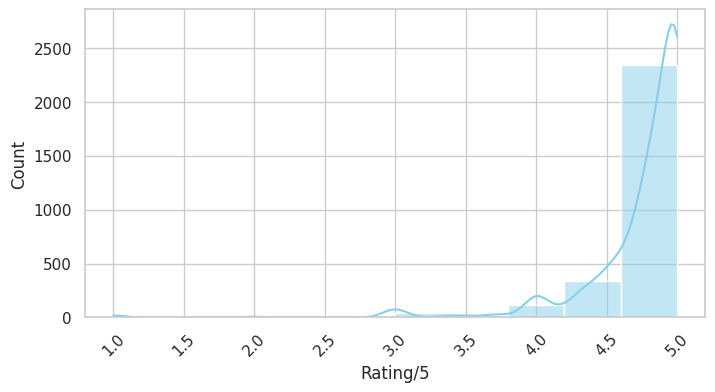

In [6]:
# Distribucion de los Ratings
sns.histplot(df["Rating/5"], kde=True, bins=10, color="skyblue")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10)) 
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_49243/3975934988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Tipo", order=df['Tipo'].value_counts().index, palette="viridis")


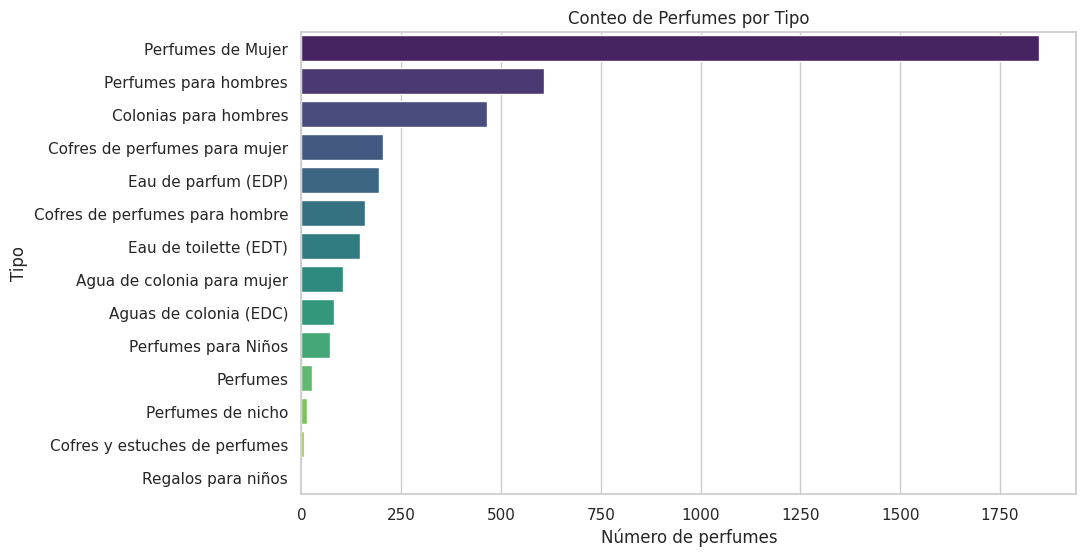

In [7]:
# Conteo de perfumes por tipo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="Tipo", order=df['Tipo'].value_counts().index, palette="viridis")
plt.title("Conteo de Perfumes por Tipo")
plt.xlabel("Número de perfumes")
plt.ylabel("Tipo")
plt.show();

/tmp/ipykernel_49243/281978057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_sexo.index, y=conteo_sexo.values, palette=colores_barras)


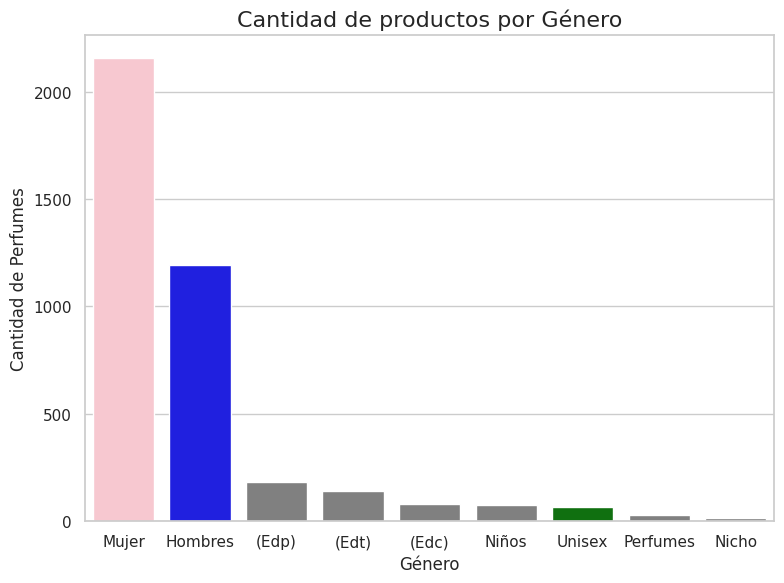

In [8]:
 ##Conteo de perfumes por sexo

conteo_sexo = df['Sexo'].value_counts()
colores = {'Mujer': 'pink', 'Hombres': 'blue', 'Unisex': 'green'}
colores_barras = [colores.get(categoria, 'gray') for categoria in conteo_sexo.index]


plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_sexo.index, y=conteo_sexo.values, palette=colores_barras)


plt.title('Cantidad de productos por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Perfumes', fontsize=12)


plt.tight_layout()
plt.show()

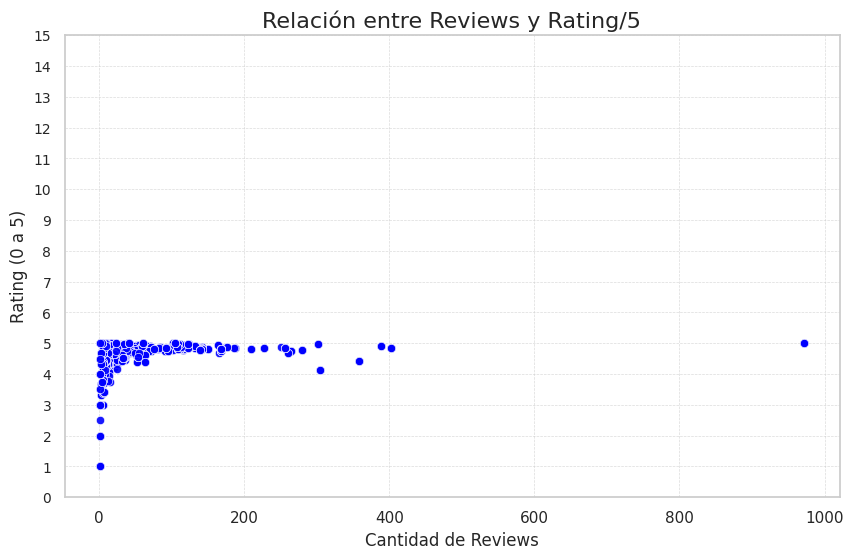

In [9]:
# Relación entre Reviews y Rating
sns.set(style="whitegrid")

#scatterplot
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x='Reviews', y='Rating/5', alpha=0.9, color='blue')


plt.title('Relación entre Reviews y Rating/5', fontsize=16)
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Rating (0 a 5)', fontsize=12)

plt.ylim(0, 5)  
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], fontsize=10)

plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

plt.show();

/tmp/ipykernel_49243/2959079336.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_familias  , y='Fam_olfativa', order=topFamOlf, palette='viridis')


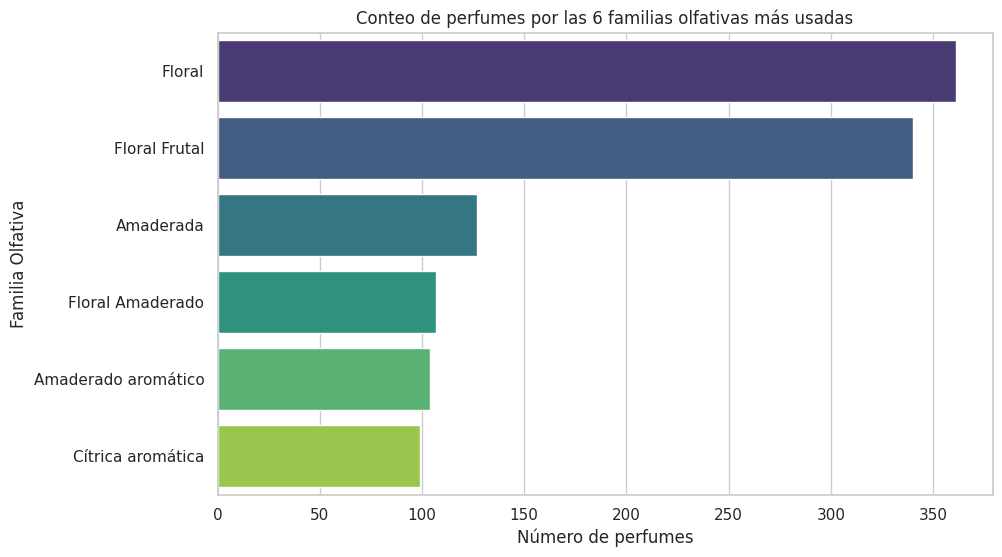

In [10]:
df.Fam_olfativa=df.Fam_olfativa.replace('Floral afrutada','Floral Frutal')
topFamOlf=df['Fam_olfativa'].value_counts().head(6).index
df_top_familias = df[df['Fam_olfativa'].isin(topFamOlf)]
##'Cuantos perfumes hay por cada familia floral??
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_familias  , y='Fam_olfativa', order=topFamOlf, palette='viridis')
plt.title('Conteo de perfumes por las 6 familias olfativas más usadas')
plt.xlabel('Número de perfumes')
plt.ylabel('Familia Olfativa')
plt.show();

/tmp/ipykernel_49243/1921014036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=notas_comunes.head(15), x="Frecuencia", y="Nota", palette="viridis")


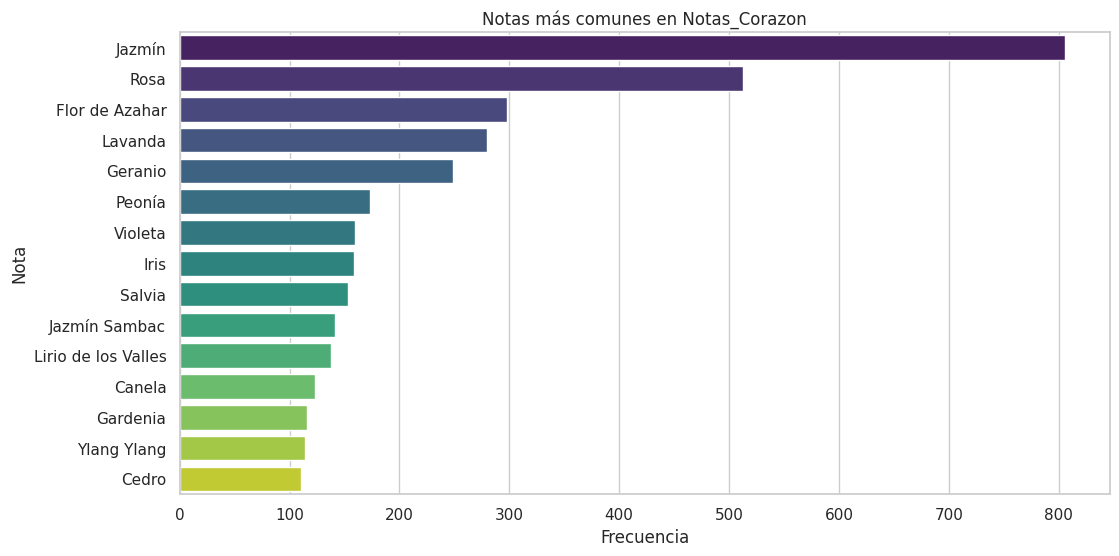

In [11]:
from collections import Counter
# Desglose de las Notas_Corazon
notas_corazon = df['Notas_Corazon'].dropna().str.split(', ').sum()
conteo_notas = Counter(notas_corazon)
notas_comunes = pd.DataFrame(conteo_notas.items(), columns=["Nota", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=notas_comunes.head(15), x="Frecuencia", y="Nota", palette="viridis")
plt.title("Notas más comunes en Notas_Corazon")
plt.xlabel("Frecuencia")
plt.ylabel("Nota")
plt.show();

/tmp/ipykernel_49243/3703286557.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


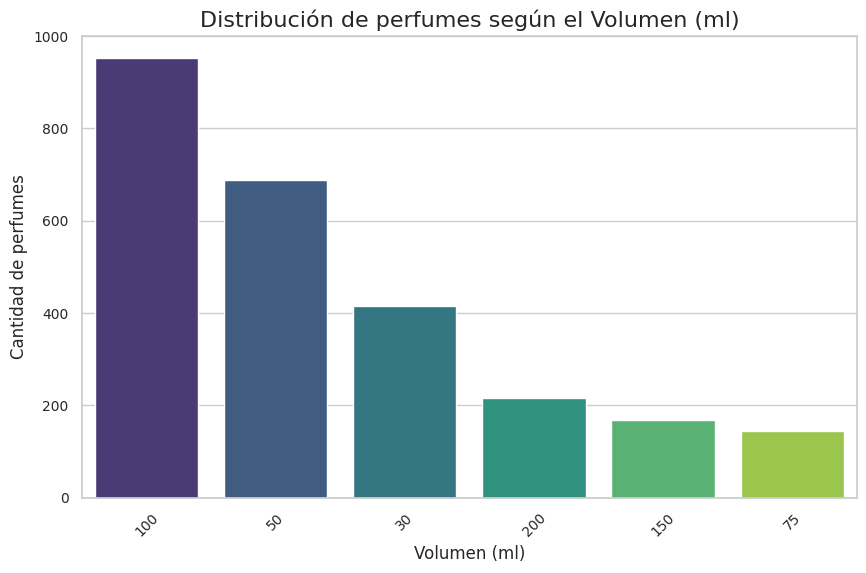

In [12]:
# Conteo de Vol(ml)
volumenes_mas_comunes = df['Vol(ml)'].value_counts().head(6)


plt.figure(figsize=(10, 6))
sns.barplot(
    x=volumenes_mas_comunes.index, 
    y=volumenes_mas_comunes.values, 
    order=volumenes_mas_comunes.index,  
    palette='viridis'
)
plt.title('Distribución de perfumes según el Volumen (ml)', fontsize=16)
plt.xlabel('Volumen (ml)', fontsize=12)
plt.ylabel('Cantidad de perfumes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

/tmp/ipykernel_49243/1993839490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marcas.values, y=top_marcas.index,palette='muted')


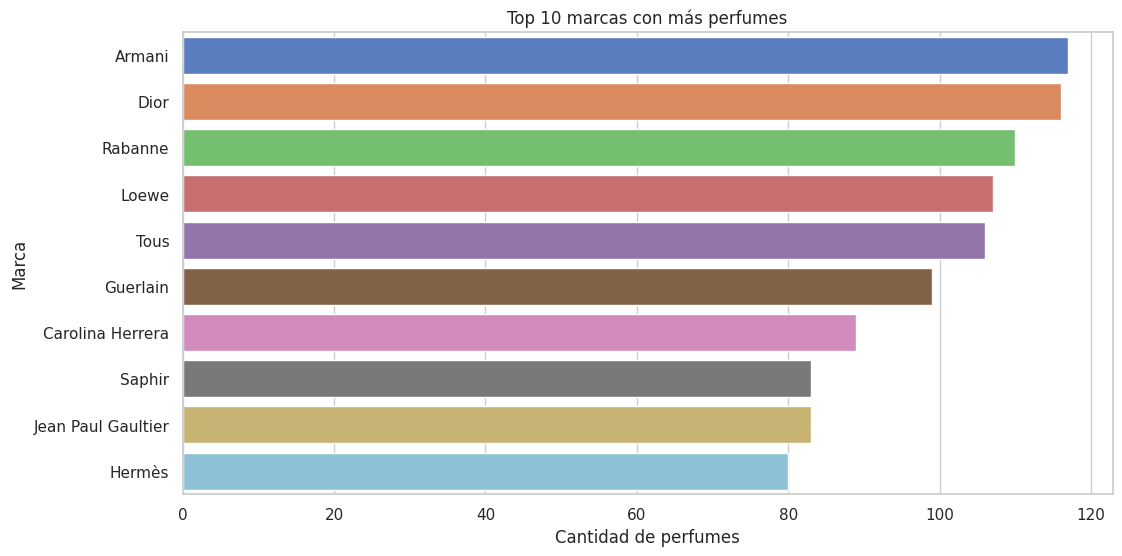

In [13]:
# 10 marcas con mas perfumes
top_marcas = df['Marca'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_marcas.values, y=top_marcas.index,palette='muted')
plt.title('Top 10 marcas con más perfumes')
plt.xlabel('Cantidad de perfumes')
plt.ylabel('Marca')
plt.show();

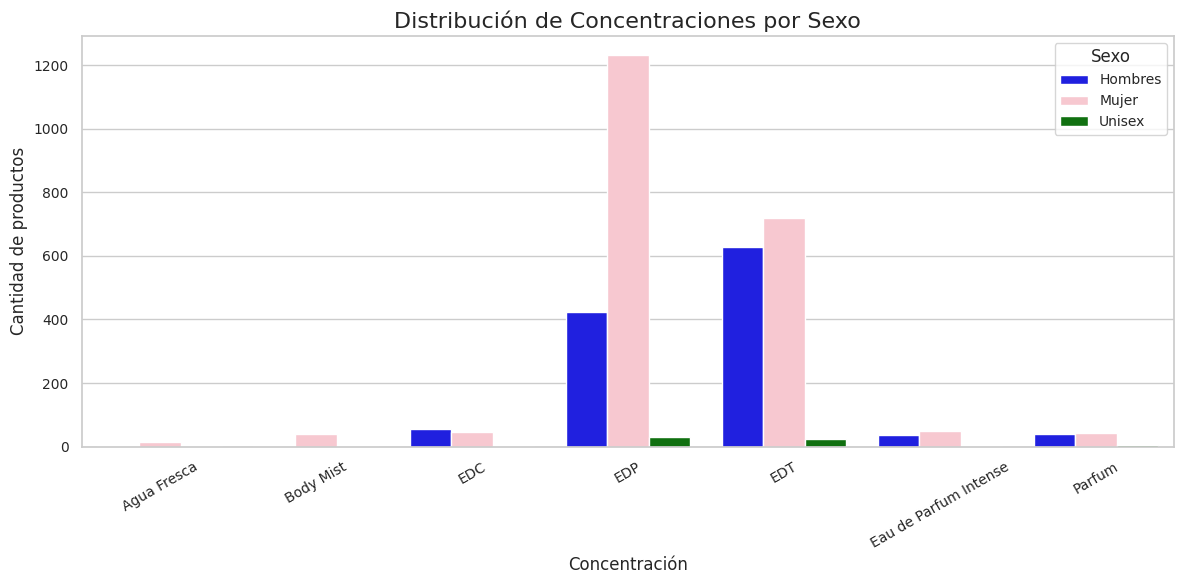

In [14]:
#Distribucion de concentraciones por Sexo
df_filtrado = df[df['Sexo'].isin(['Mujer', 'Hombres', 'Unisex'])]


concentracion_por_sexo = df_filtrado.groupby(['Sexo', 'Concentracion']).size().reset_index(name='Cantidad')
custom_palette = {
    "Mujer": "pink",
    "Hombres": "blue",
    "Unisex": "green"}


plt.figure(figsize=(12, 6))
sns.barplot(
    data=concentracion_por_sexo,
    x='Concentracion',
    y='Cantidad',
    hue='Sexo',  
    palette=custom_palette
)


plt.title('Distribución de Concentraciones por Sexo', fontsize=16)
plt.xlabel('Concentración', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sexo', fontsize=10)
plt.tight_layout()
plt.show();

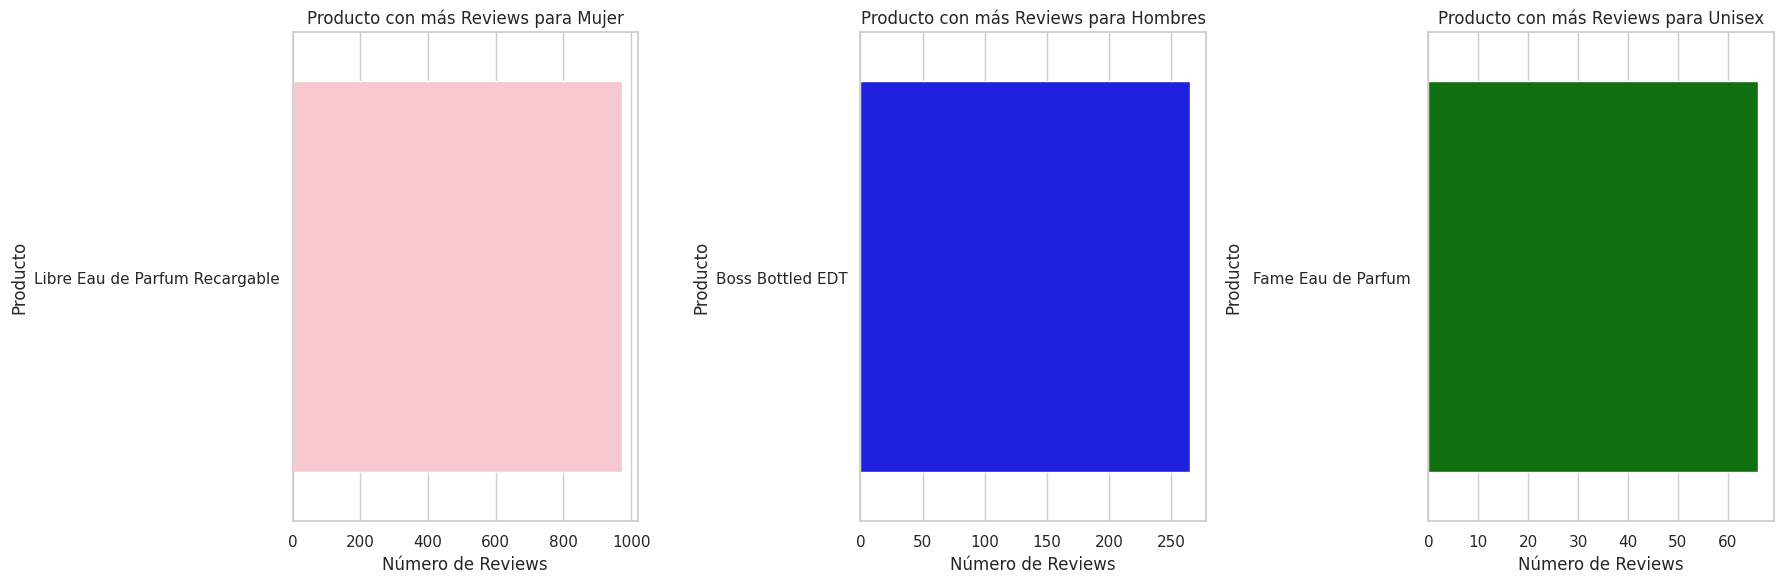

In [15]:
# cual es el producto con mas reviews para mujer, hombre y Unisex (buenos o malos)

df_mujer = df[df['Sexo'] == 'Mujer']
df_hombres = df[df['Sexo'] == 'Hombres']
df_unisex = df[df['Sexo'] == 'Unisex']

top_mujer = df_mujer.loc[df_mujer['Reviews'].idxmax()]
top_hombres = df_hombres.loc[df_hombres['Reviews'].idxmax()]
top_unisex = df_unisex.loc[df_unisex['Reviews'].idxmax()]


plt.figure(figsize=(18, 6))

# Mujer
plt.subplot(1, 3, 1)
sns.barplot(x=[top_mujer['Reviews']], y=[top_mujer['Nombre']], color='pink')


plt.title('Producto con más Reviews para Mujer')
plt.xlabel('Número de Reviews')
plt.ylabel('Producto')

#Hombres
plt.subplot(1, 3, 2)
sns.barplot(x=[top_hombres['Reviews']], y=[top_hombres['Nombre']], color='blue')
plt.title('Producto con más Reviews para Hombres')
plt.xlabel('Número de Reviews')
plt.ylabel('Producto')

#Unisex
plt.subplot(1, 3, 3)
sns.barplot(x=[top_unisex['Reviews']], y=[top_unisex['Nombre']], color='green')
plt.title('Producto con más Reviews para Unisex')
plt.xlabel('Número de Reviews')
plt.ylabel('Producto')


plt.tight_layout()
plt.show();

NameError: name 'top_ninos' is not defined

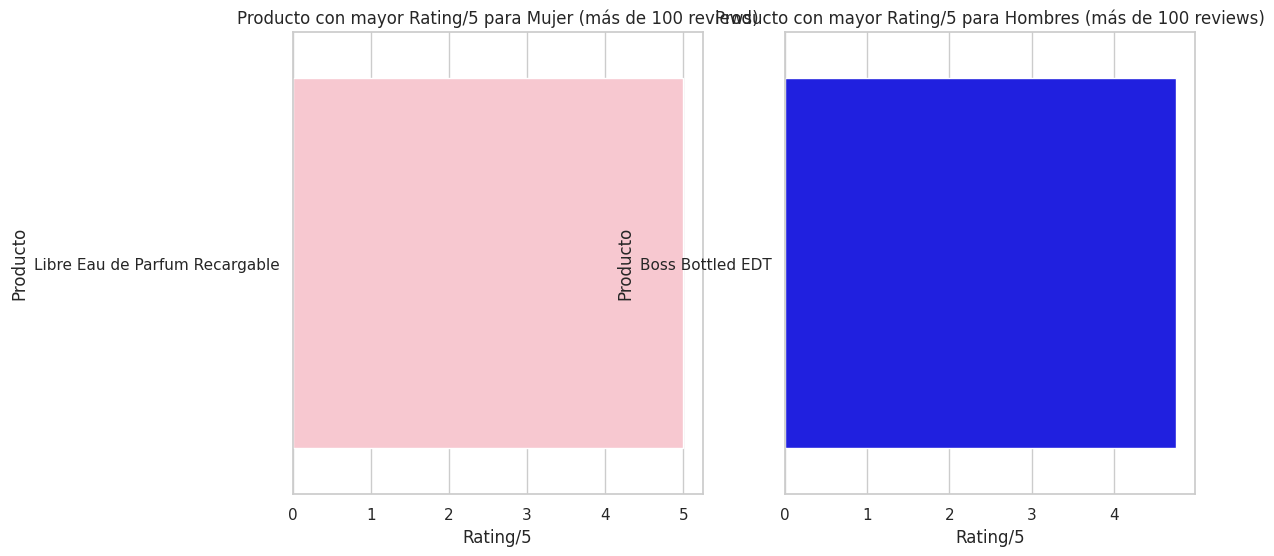

In [16]:
# Filtrar los datos para cada género, y agregar la condición de que "Reviews" sea mayor a 100 con mejor rating
df_mujer = df[(df['Sexo'] == 'Mujer') & (df['Reviews'] > 100)]
df_hombres = df[(df['Sexo'] == 'Hombres') & (df['Reviews'] > 100)]
df_ninos = df[(df['Sexo'] == 'Niños') & (df['Reviews'] > 100)]



plt.figure(figsize=(18, 6))

# Mujer
if top_mujer is not None:
    plt.subplot(1, 3, 1)
    sns.barplot(x=[top_mujer['Rating/5']], y=[top_mujer['Nombre']], color='pink')
    plt.title('Producto con mayor Rating/5 para Mujer (más de 100 reviews)')
    plt.xlabel('Rating/5')
    plt.ylabel('Producto')
else:
    plt.subplot(1, 3, 1)
    plt.text(0.5, 0.5, 'No hay productos con más de 100 reviews para Mujer', ha='center', va='center', fontsize=12)

# Hombres
if top_hombres is not None:
    plt.subplot(1, 3, 2)
    sns.barplot(x=[top_hombres['Rating/5']], y=[top_hombres['Nombre']], color='blue')
    plt.title('Producto con mayor Rating/5 para Hombres (más de 100 reviews)')
    plt.xlabel('Rating/5')
    plt.ylabel('Producto')
else:
    plt.subplot(1, 3, 2)
    plt.text(0.5, 0.5, 'No hay productos con más de 100 reviews para Hombres', ha='center', va='center', fontsize=12)

#Niños
if top_ninos is not None:
    plt.subplot(1, 3, 3)
    sns.barplot(x=[top_ninos['Rating/5']], y=[top_ninos['Nombre']], color='green')
    plt.title('Producto con mayor Rating/5 para Niños (más de 100 reviews)')
    plt.xlabel('Rating/5')
    plt.ylabel('Producto')
else:
    plt.subplot(1, 3, 3)
    plt.text(0.5, 0.5, 'No hay productos con más de 100 reviews para Niños', ha='center', va='center', fontsize=12)


plt.tight_layout()
plt.show();

/tmp/ipykernel_49243/1641664944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


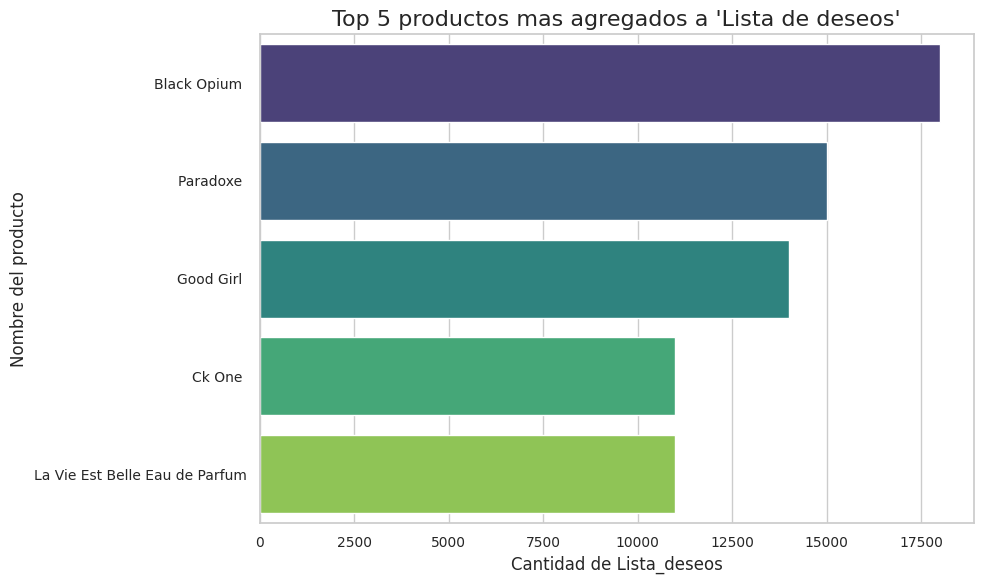

In [17]:
df['Lista_deseos'] = pd.to_numeric(df['Lista_deseos'], errors='coerce').fillna(0).astype(int)


top_5_deseo = df[['Nombre', 'Lista_deseos']].sort_values(by='Lista_deseos', ascending=False).head(15)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_deseo,
    x='Lista_deseos',
    y='Nombre',
    palette='viridis'
)


plt.title("Top 5 productos mas agregados a 'Lista de deseos'", fontsize=16)
plt.xlabel('Cantidad de Lista_deseos', fontsize=12)
plt.ylabel('Nombre del producto', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show();

/tmp/ipykernel_49243/3066480238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_marcas, x='Lista_deseos', y='Marca', palette='plasma')


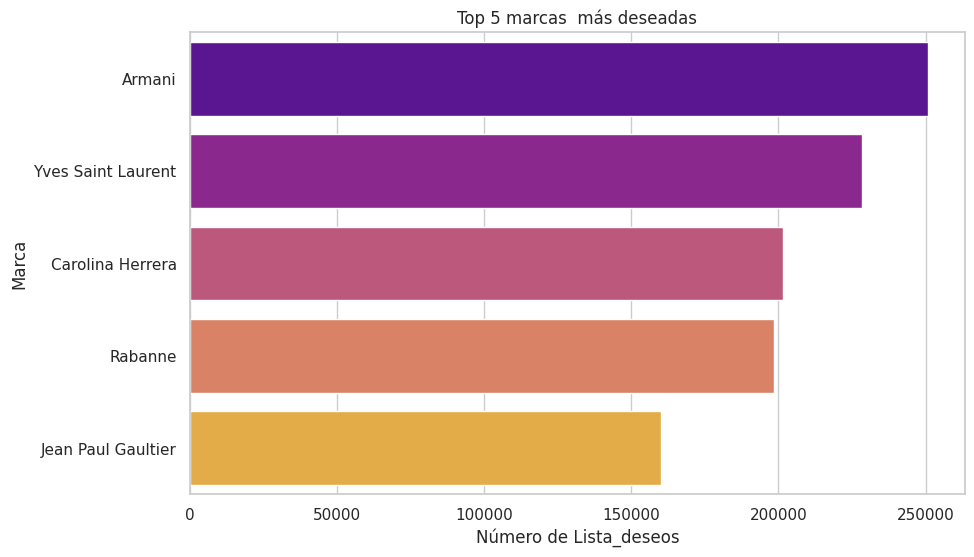

In [18]:
#Top 5 marcas mas agregados a Lista de deseos
likes_por_marca = df.groupby('Marca')['Lista_deseos'].sum().reset_index()

# Ordenar
top_5_marcas = likes_por_marca.sort_values(by='Lista_deseos', ascending=False).head(5)
 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_marcas, x='Lista_deseos', y='Marca', palette='plasma')

plt.title('Top 5 marcas  más deseadas')
plt.xlabel('Número de Lista_deseos')
plt.ylabel('Marca')
plt.show();

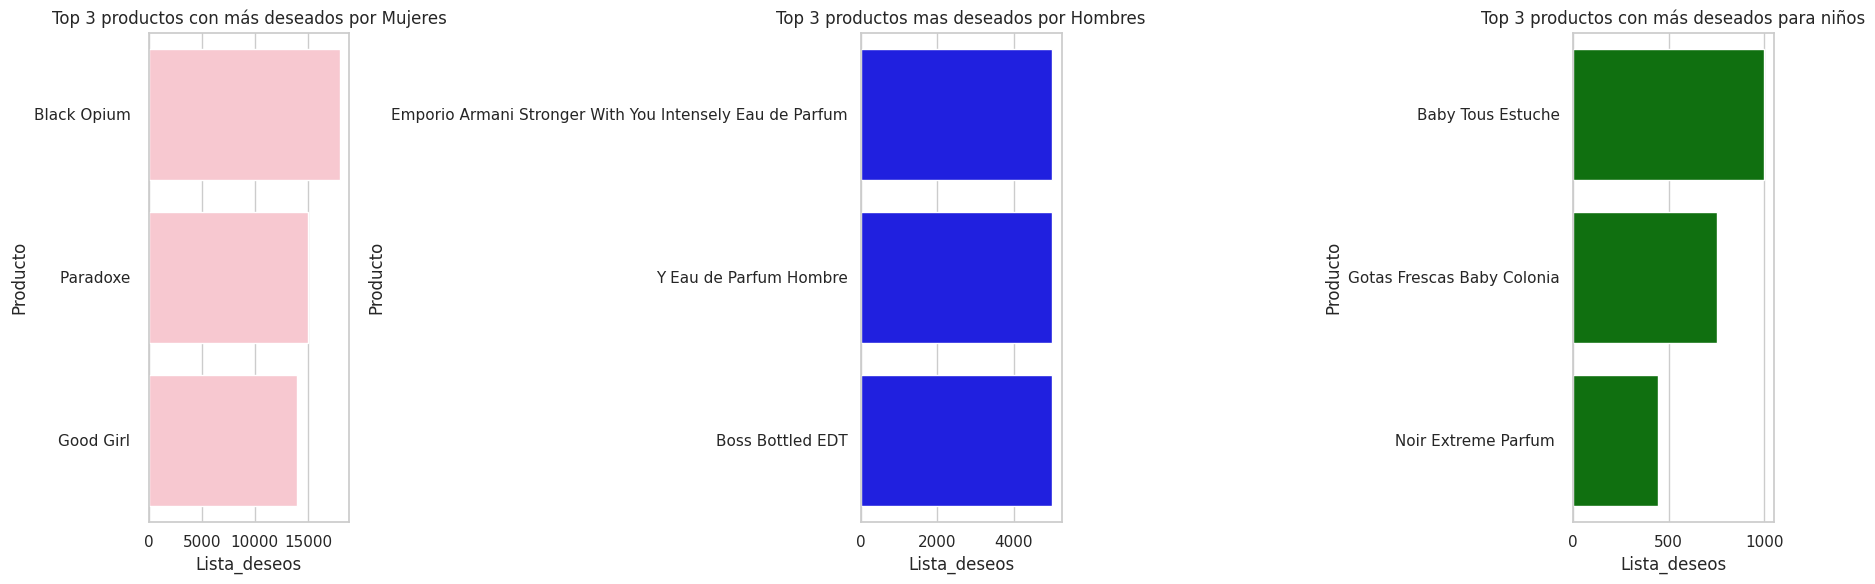

In [19]:
#Filtrar
df_mujer = df[df['Sexo'] == 'Mujer']
df_hombres = df[df['Sexo'] == 'Hombres']
df_ninos = df[df['Sexo'] == 'Niños']

# Asegurarnos de obtener exactamente los 3 productos  mas deseados
top_3_mujer = df_mujer.sort_values(by='Lista_deseos', ascending=False).head(9)
top_3_hombres = df_hombres.sort_values(by='Lista_deseos', ascending=False).head(8)
top_3_ninos = df_ninos.sort_values(by='Lista_deseos', ascending=False).head(5)

#grafica
plt.figure(figsize=(18, 6))

# Mujeres
plt.subplot(1, 3, 1)
sns.barplot(data=top_3_mujer, x="Lista_deseos", y="Nombre", color="pink")
plt.title('Top 3 productos con más deseados por Mujeres')
plt.xlabel('Lista_deseos')
plt.ylabel('Producto')

#Hombres
plt.subplot(1, 3, 2)
sns.barplot(data=top_3_hombres, x="Lista_deseos", y="Nombre", color="blue")
plt.title('Top 3 productos mas deseados por Hombres')
plt.xlabel('Lista_deseos')
plt.ylabel('Producto')

#Niños
plt.subplot(1, 3, 3)
sns.barplot(data=top_3_ninos, x="Lista_deseos", y="Nombre", color="green")
plt.title('Top 3 productos con más deseados para niños')
plt.xlabel('Lista_deseos')
plt.ylabel('Producto')


plt.tight_layout()
plt.show()##

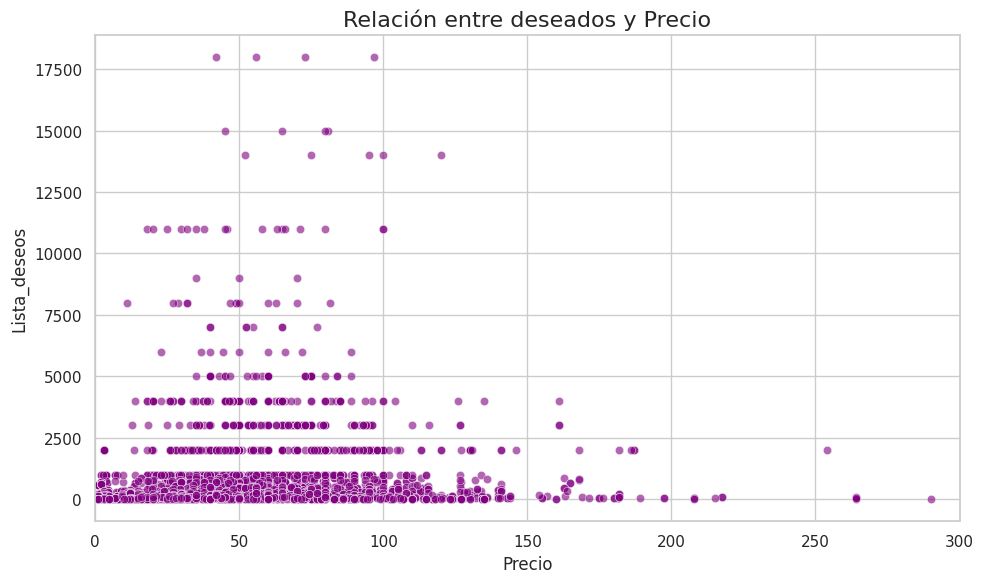

In [20]:
# grafico de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precio', y='Lista_deseos', data=df, color='purple', alpha=0.6)


plt.title('Relación entre deseados y Precio', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Lista_deseos', fontsize=12)
plt.xlim(0, 300)

plt.tight_layout()
plt.show();

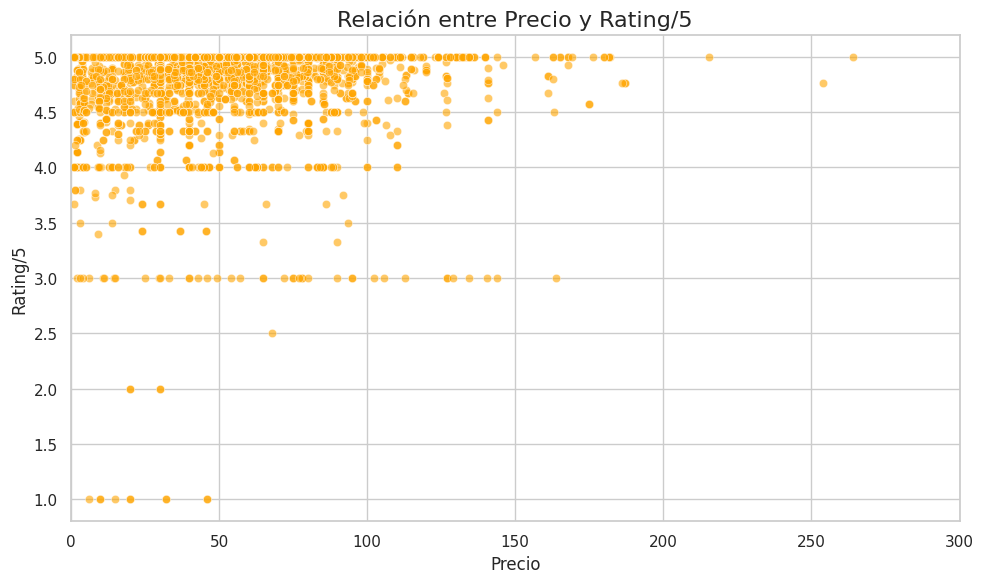

In [21]:
df['Rating/5'] = pd.to_numeric(df['Rating/5'], errors='coerce')


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precio', y='Rating/5', data=df, color='orange', alpha=0.6)


plt.title('Relación entre Precio y Rating/5', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Rating/5', fontsize=12)


plt.xlim(0, 300)


plt.tight_layout()
plt.show()

/tmp/ipykernel_49243/1090688656.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top3_caras.values, y=top3_caras.index, ax=axes[0], palette='coolwarm')
/tmp/ipykernel_49243/1090688656.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top3_baratas.values, y=top3_baratas.index, ax=axes[1], palette='viridis')


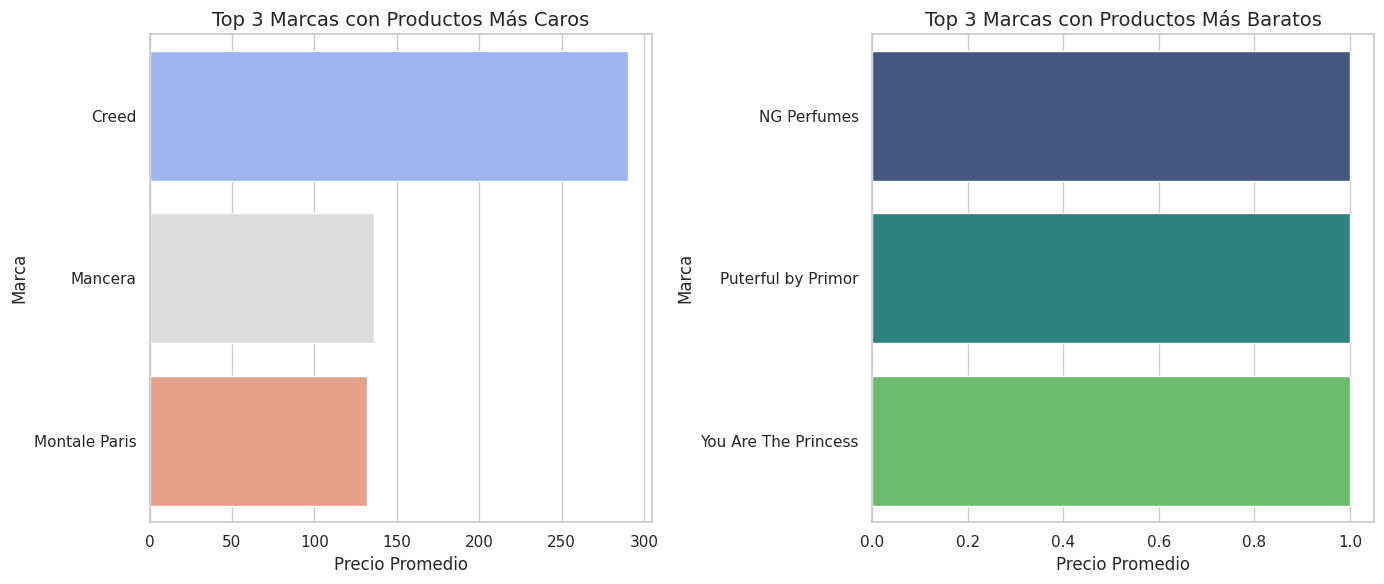

In [22]:
precio_promedio_marca = df.groupby('Marca')['Precio'].mean().sort_values(ascending=False)


top3_caras = precio_promedio_marca.head(3)
top3_baratas = precio_promedio_marca.tail(3)

#subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=top3_caras.values, y=top3_caras.index, ax=axes[0], palette='coolwarm')
axes[0].set_title('Top 3 Marcas con Productos Más Caros', fontsize=14)
axes[0].set_xlabel('Precio Promedio', fontsize=12)
axes[0].set_ylabel('Marca', fontsize=12)

sns.barplot(x=top3_baratas.values, y=top3_baratas.index, ax=axes[1], palette='viridis')
axes[1].set_title('Top 3 Marcas con Productos Más Baratos', fontsize=14)
axes[1].set_xlabel('Precio Promedio', fontsize=12)
axes[1].set_ylabel('Marca', fontsize=12)


plt.tight_layout()
plt.show();

/tmp/ipykernel_49243/2535363156.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio_top5_likes.values, y=precio_promedio_top5_likes.index, palette='magma')


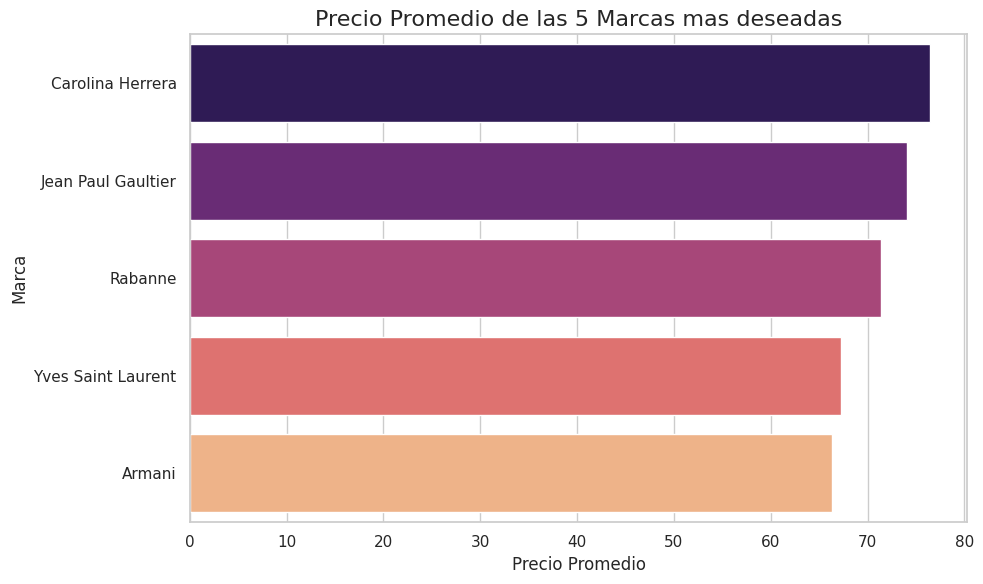

In [23]:
deseados_por_marca = df.groupby('Marca')['Lista_deseos'].sum().sort_values(ascending=False)

#5 marcas mas deseados
top5_marcas_likes = deseados_por_marca.head(5).index

df_top5_likes = df[df['Marca'].isin(top5_marcas_likes)]

#precio promedio
precio_promedio_top5_likes = df_top5_likes.groupby('Marca')['Precio'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=precio_promedio_top5_likes.values, y=precio_promedio_top5_likes.index, palette='magma')


plt.title('Precio Promedio de las 5 Marcas mas deseadas', fontsize=16)
plt.xlabel('Precio Promedio', fontsize=12)
plt.ylabel('Marca', fontsize=12)


plt.tight_layout()
plt.show();

/tmp/ipykernel_49243/4230424685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio_concentracion.values, y=precio_promedio_concentracion.index, palette='viridis')


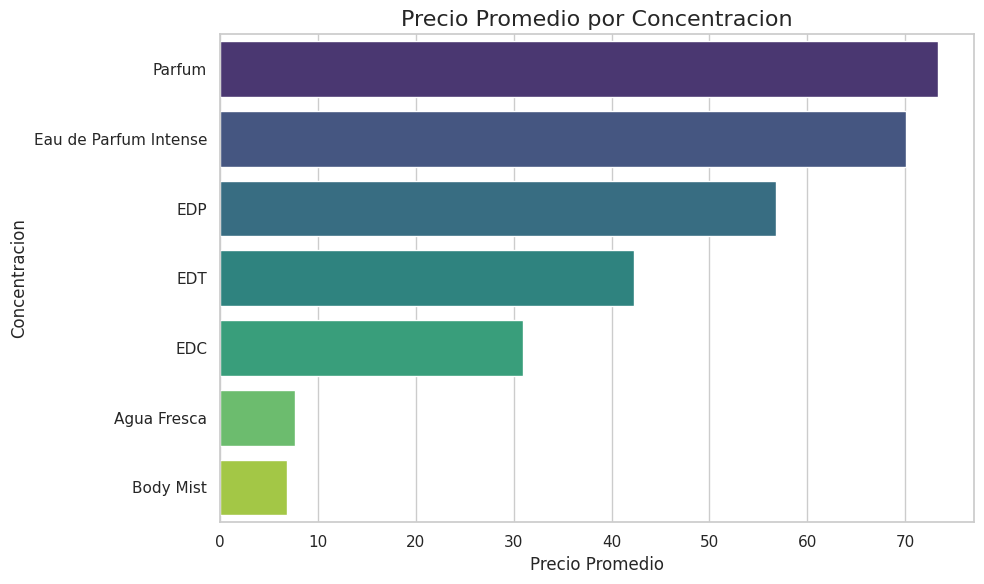

In [24]:
precio_promedio_concentracion = df.groupby('Concentracion')['Precio'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=precio_promedio_concentracion.values, y=precio_promedio_concentracion.index, palette='viridis')

plt.title('Precio Promedio por Concentracion', fontsize=16)
plt.xlabel('Precio Promedio', fontsize=12)
plt.ylabel('Concentracion', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipykernel_49243/3371020897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[producto_mas_caro['Precio']], y=[producto_mas_caro['Nombre']], ax=axes[0], palette='coolwarm')
/tmp/ipykernel_49243/3371020897.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[producto_mas_barato['Precio']], y=[producto_mas_barato['Nombre']], ax=axes[1], palette='viridis')


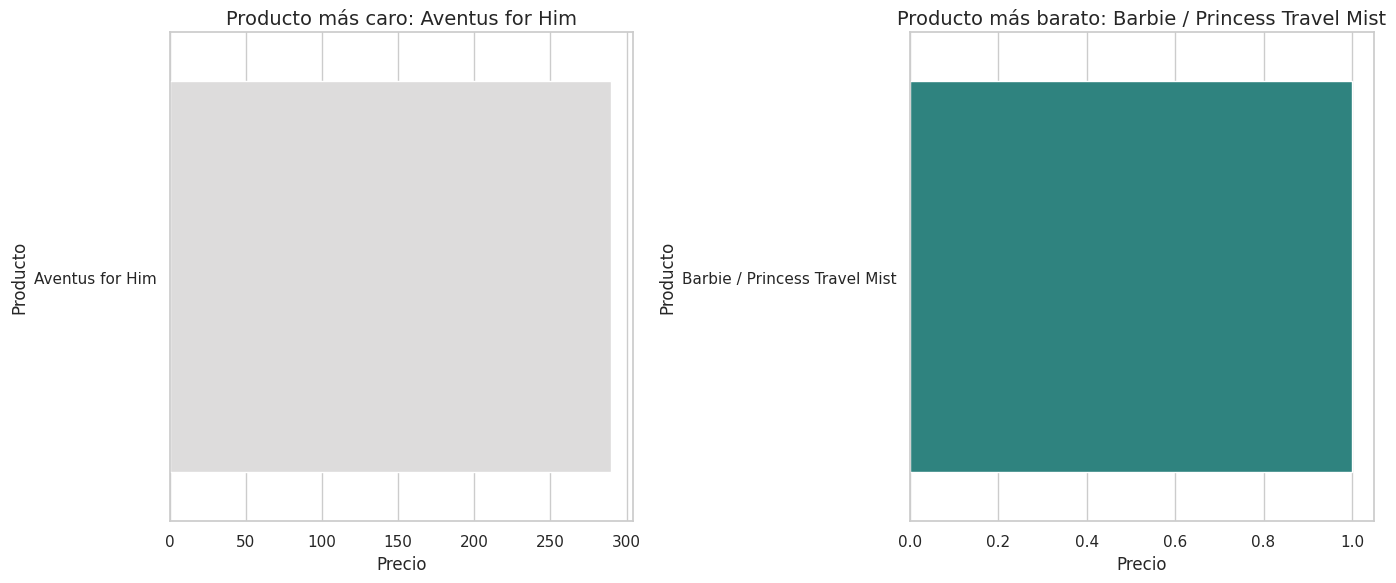

In [25]:
producto_mas_caro = df.loc[df['Precio'].idxmax()]
producto_mas_barato = df.loc[df['Precio'].idxmin()]

# Crear el subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#mas caro
sns.barplot(x=[producto_mas_caro['Precio']], y=[producto_mas_caro['Nombre']], ax=axes[0], palette='coolwarm')
axes[0].set_title(f'Producto más caro: {producto_mas_caro["Nombre"]}', fontsize=14)
axes[0].set_xlabel('Precio', fontsize=12)
axes[0].set_ylabel('Producto', fontsize=12)

#mas barato
sns.barplot(x=[producto_mas_barato['Precio']], y=[producto_mas_barato['Nombre']], ax=axes[1], palette='viridis')
axes[1].set_title(f'Producto más barato: {producto_mas_barato["Nombre"]}', fontsize=14)
axes[1].set_xlabel('Precio', fontsize=12)
axes[1].set_ylabel('Producto', fontsize=12)

plt.tight_layout()
plt.show();

/tmp/ipykernel_49243/3030778353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rating['Notas_Corazon'] = top_rating['Notas_Corazon'].apply(
/tmp/ipykernel_49243/3030778353.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_notas.index, y=top_5_notas.values, palette='viridis')


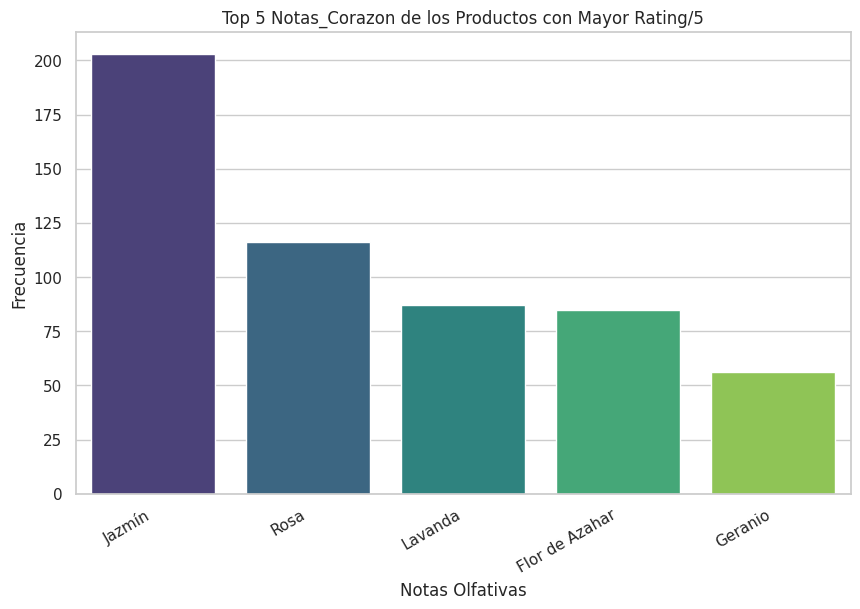

In [31]:
# Filtramos 
top_rating = df[df['Rating/5'] >= df['Rating/5'].max()] 

# Convertimos solo si es string
top_rating['Notas_Corazon'] = top_rating['Notas_Corazon'].apply(
    lambda x: x.split(', ') if isinstance(x, str) else []
)

# Explota las listas
notas = top_rating['Notas_Corazon'].explode()

# Cuenta las 5 más frecuentes
top_5_notas = notas.value_counts().head(5)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_notas.index, y=top_5_notas.values, palette='viridis')
plt.title('Top 5 Notas_Corazon de los Productos con Mayor Rating/5')
plt.xlabel('Notas Olfativas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30, ha='right')  
plt.show()


/tmp/ipykernel_49243/4183224903.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_notas_precio.index, y=top_5_notas_precio.values, palette='viridis')


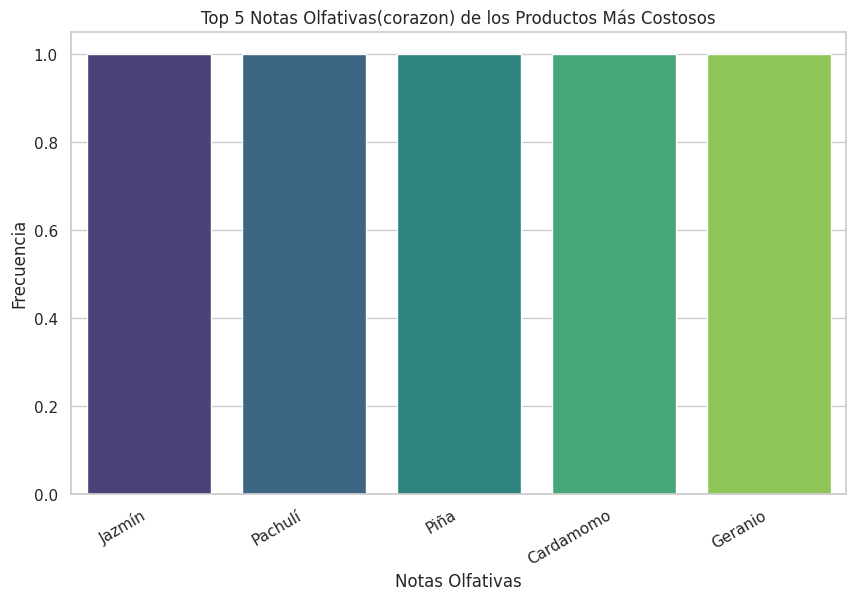

In [33]:

top_precio = df[df['Precio'].notna()]
top_precio = top_precio.sort_values(by='Precio', ascending=False)


top_precio = top_precio.head(5)


top_precio['Notas_Corazon'] = top_precio['Notas_Corazon'].apply(lambda x: x.split(', '))


notas_precio = top_precio['Notas_Corazon'].explode()

top_5_notas_precio = notas_precio.value_counts().head(5)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_notas_precio.index, y=top_5_notas_precio.values, palette='viridis')
plt.title('Top 5 Notas Olfativas(corazon) de los Productos Más Costosos')
plt.xlabel('Notas Olfativas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30, ha='right')
plt.show();

/tmp/ipykernel_49243/1805198477.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_notas_precio.index, y=top_5_notas_precio.values, palette='viridis')


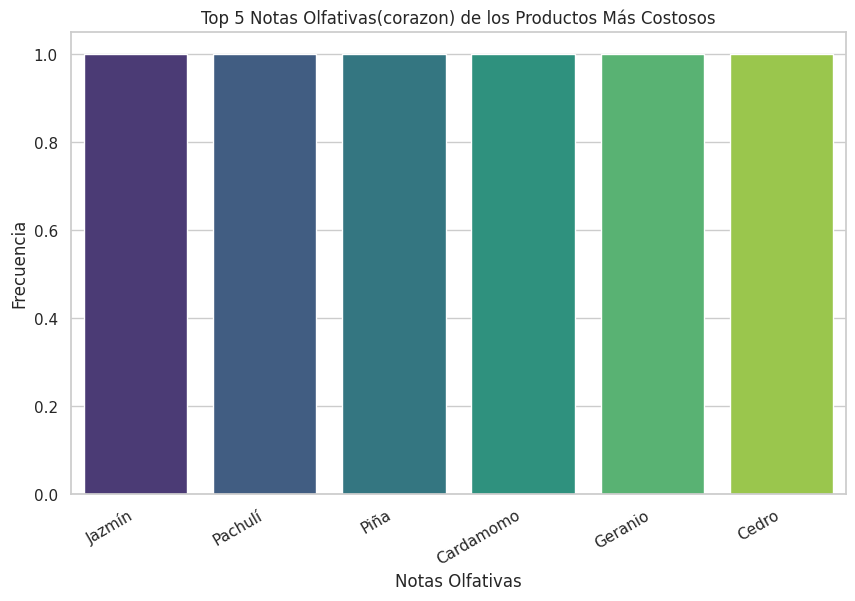

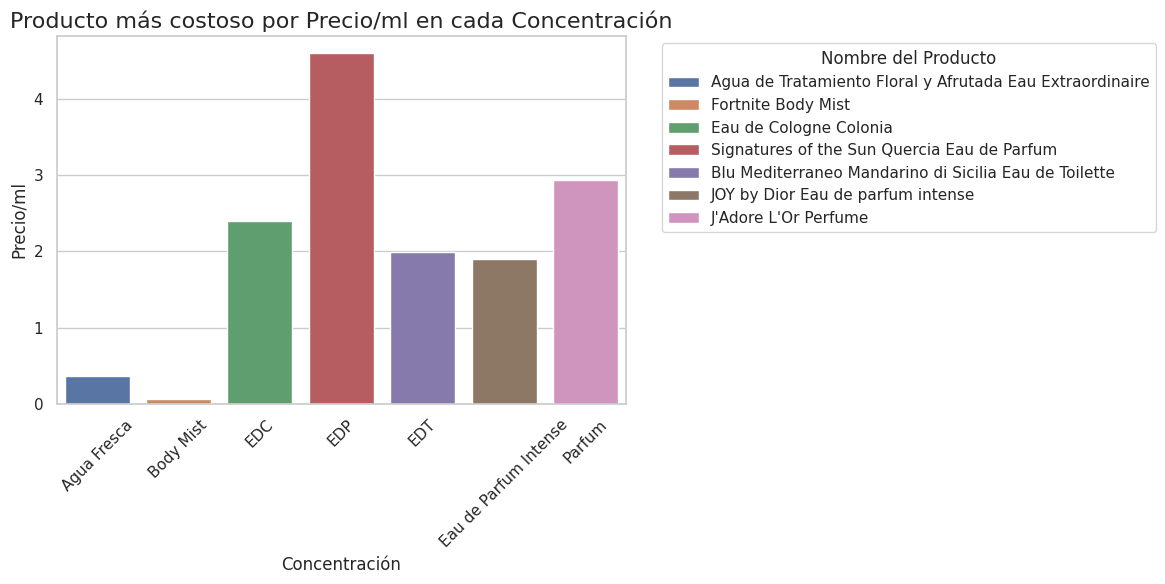

In [35]:
productos_mas_costosos_ml = df.loc[df.groupby('Concentracion')['Precio/ml'].idxmax()]
plt.figure(figsize=(12, 6))
sns.barplot(
    data=productos_mas_costosos_ml,
    x='Concentracion',
    y='Precio/ml',
    hue='Nombre',
    dodge=False
)

plt.title('Producto más costoso por Precio/ml en cada Concentración', fontsize=16)
plt.xlabel('Concentración', fontsize=12)
plt.ylabel('Precio/ml', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Nombre del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show();

/tmp/ipykernel_49243/1368544131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Concentracion', y='Precio/ml', data=precio_ml_promedio_por_concentracion, palette='Blues')


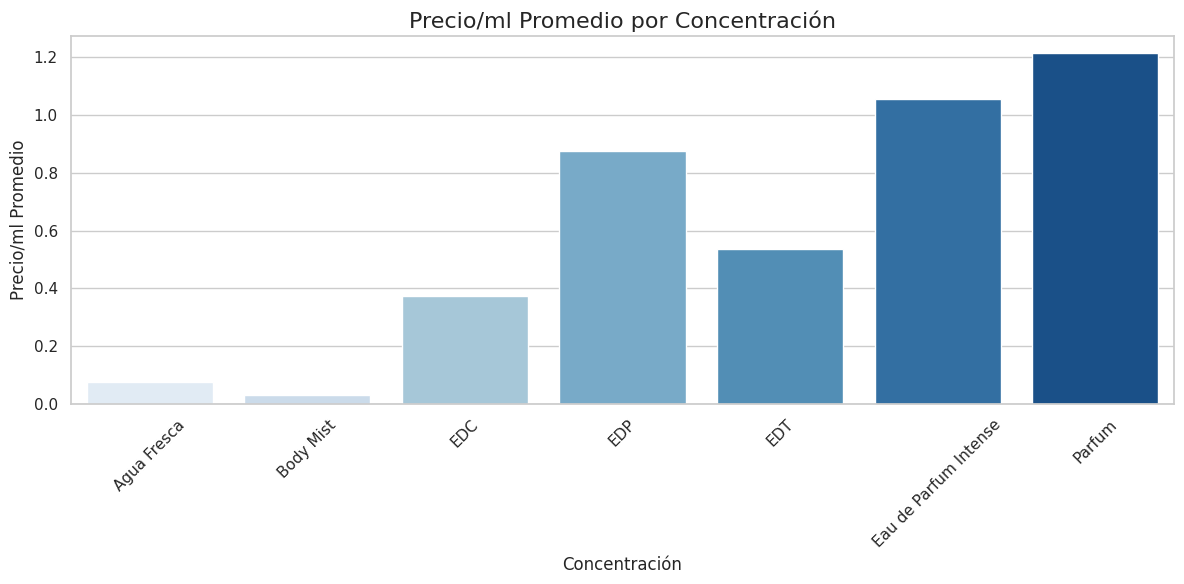

In [36]:
precio_ml_promedio_por_concentracion = df.groupby('Concentracion')['Precio/ml'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Concentracion', y='Precio/ml', data=precio_ml_promedio_por_concentracion, palette='Blues')

# Ajustar etiquetas y título
plt.title('Precio/ml Promedio por Concentración', fontsize=16)
plt.xlabel('Concentración', fontsize=12)
plt.ylabel('Precio/ml Promedio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_49243/1880528638.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vol(ml)_num', y='Precio/ml', data=precio_ml_promedio_por_volumen, palette='Blues')


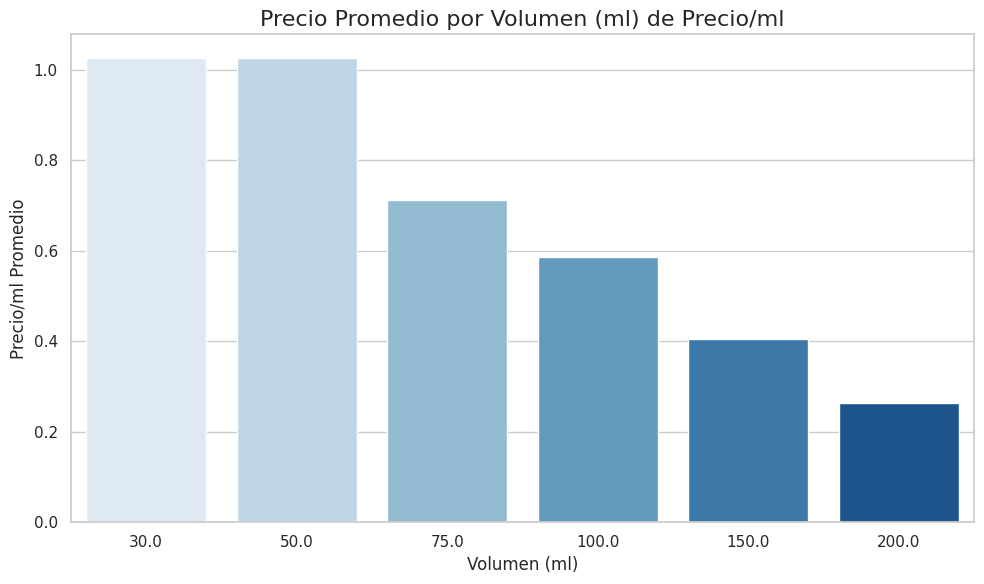

In [37]:
volumes = [100, 50, 30, 200, 150, 75]
df_filtrado = df[df['Vol(ml)_num'].isin(volumes)]

precio_ml_promedio_por_volumen = df_filtrado.groupby('Vol(ml)_num')['Precio/ml'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Vol(ml)_num', y='Precio/ml', data=precio_ml_promedio_por_volumen, palette='Blues')

plt.title('Precio Promedio por Volumen (ml) de Precio/ml', fontsize=16)
plt.xlabel('Volumen (ml)', fontsize=12)
plt.ylabel('Precio/ml Promedio', fontsize=12)

plt.tight_layout()
plt.show();

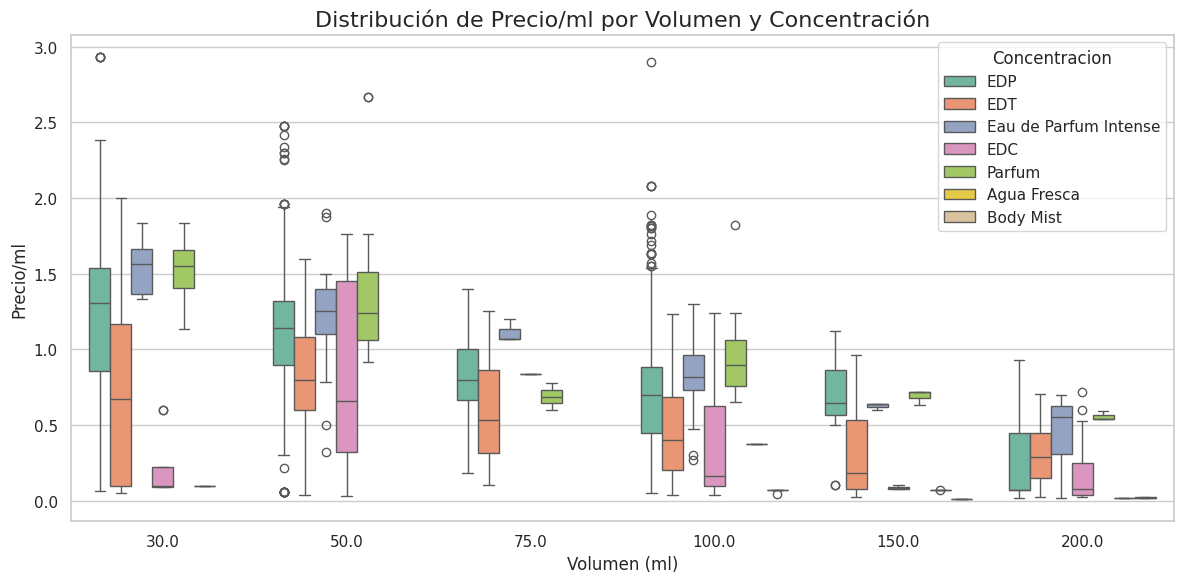

In [38]:
df_filtrado = df[df['Vol(ml)_num'].isin(volumes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='Vol(ml)_num', y='Precio/ml', hue='Concentracion', palette='Set2')

plt.title('Distribución de Precio/ml por Volumen y Concentración', fontsize=16)
plt.xlabel('Volumen (ml)', fontsize=12)
plt.ylabel('Precio/ml', fontsize=12)

plt.tight_layout()
plt.show()

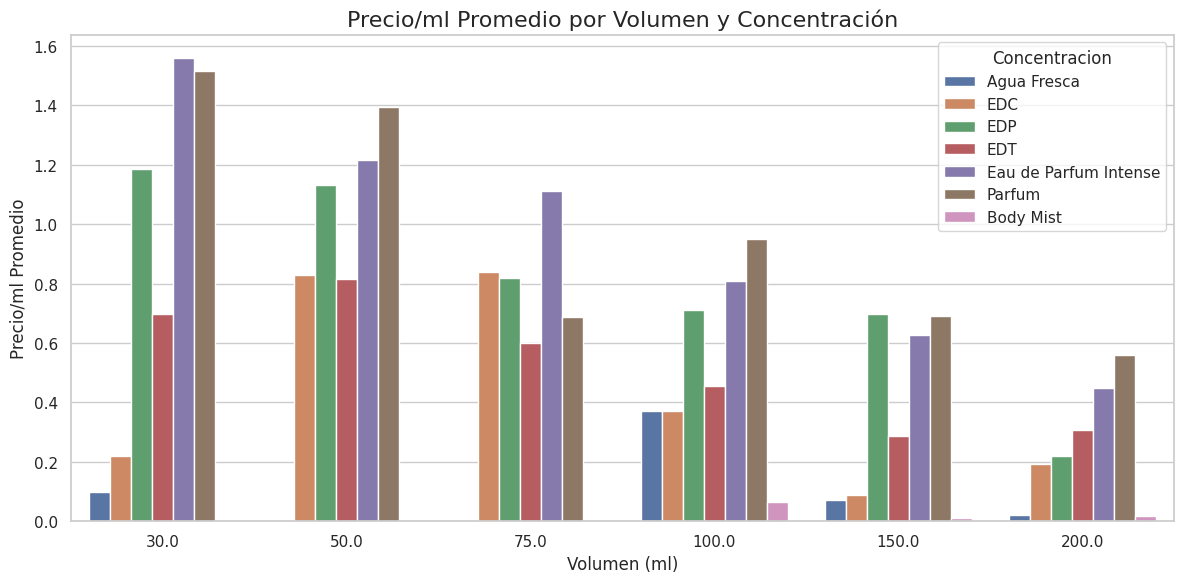

In [39]:
df_filtrado = df[df['Vol(ml)_num'].isin(volumes)]


precio_ml_promedio = df_filtrado.groupby(['Vol(ml)_num', 'Concentracion'])['Precio/ml'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=precio_ml_promedio, x='Vol(ml)_num', y='Precio/ml', hue='Concentracion', dodge=True)

plt.title('Precio/ml Promedio por Volumen y Concentración', fontsize=16)
plt.xlabel('Volumen (ml)', fontsize=12)
plt.ylabel('Precio/ml Promedio', fontsize=12)

plt.tight_layout()
plt.show()

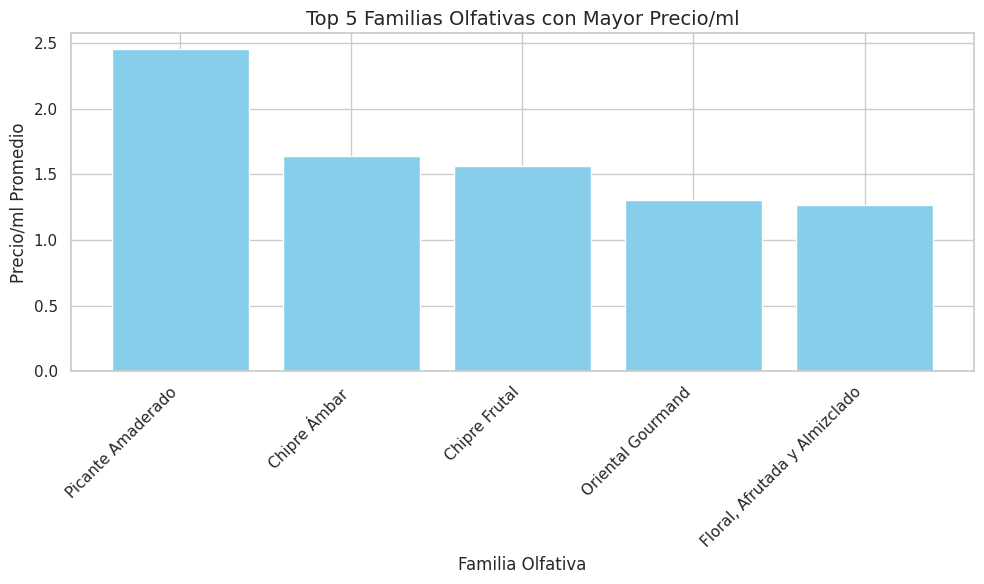

In [40]:
precio_ml_promedio_por_familia = df.groupby('Fam_olfativa')['Precio/ml'].mean().reset_index()

# Ordenar de mayor a menor
precio_ml_promedio_por_familia = precio_ml_promedio_por_familia.sort_values('Precio/ml', ascending=False)

top_5_familias = precio_ml_promedio_por_familia.head(5)


plt.figure(figsize=(10, 6))
plt.bar(top_5_familias['Fam_olfativa'], top_5_familias['Precio/ml'], color='skyblue')

plt.xlabel('Familia Olfativa', fontsize=12)
plt.ylabel('Precio/ml Promedio', fontsize=12)
plt.title('Top 5 Familias Olfativas con Mayor Precio/ml', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

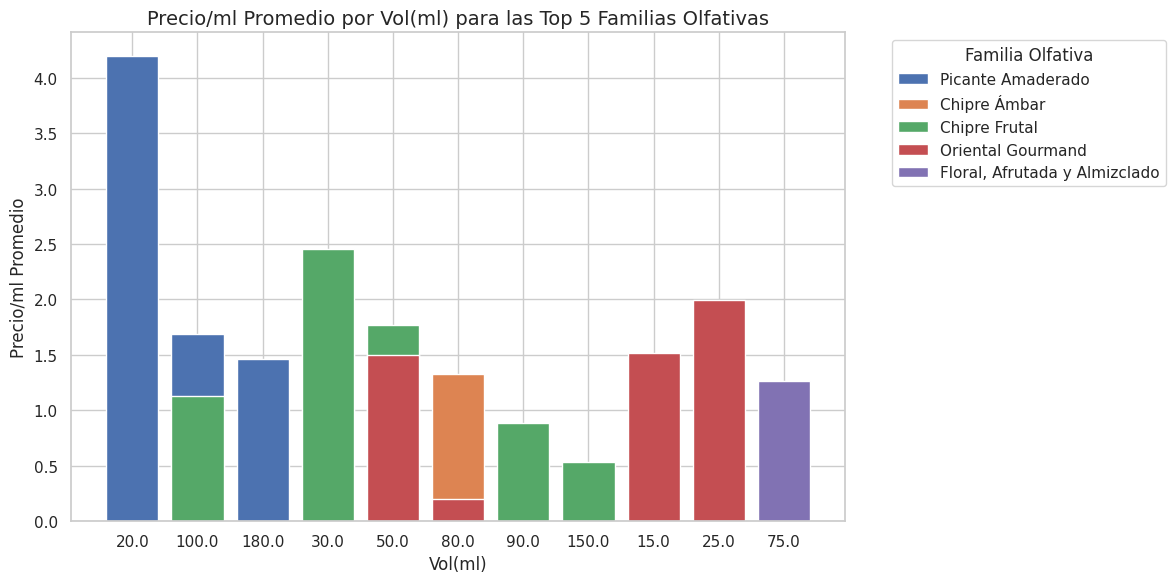

In [41]:
precio_ml_promedio_por_familia_vol = df.groupby(['Fam_olfativa', 'Vol(ml)_num'])['Precio/ml'].mean().reset_index()

precio_ml_promedio_por_familia = df.groupby('Fam_olfativa')['Precio/ml'].mean().reset_index()


precio_ml_promedio_por_familia = precio_ml_promedio_por_familia.sort_values('Precio/ml', ascending=False)


top_5_familias = precio_ml_promedio_por_familia.head(5)


top_5_familias_vol = precio_ml_promedio_por_familia_vol[precio_ml_promedio_por_familia_vol['Fam_olfativa'].isin(top_5_familias['Fam_olfativa'])]


plt.figure(figsize=(12, 6))
for familia in top_5_familias['Fam_olfativa']:
    subset = top_5_familias_vol[top_5_familias_vol['Fam_olfativa'] == familia]
    plt.bar(subset['Vol(ml)_num'].astype(str), subset['Precio/ml'], label=familia)


plt.xlabel('Vol(ml)', fontsize=12)
plt.ylabel('Precio/ml Promedio', fontsize=12)
plt.title('Precio/ml Promedio por Vol(ml) para las Top 5 Familias Olfativas', fontsize=14)
plt.legend(title='Familia Olfativa', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

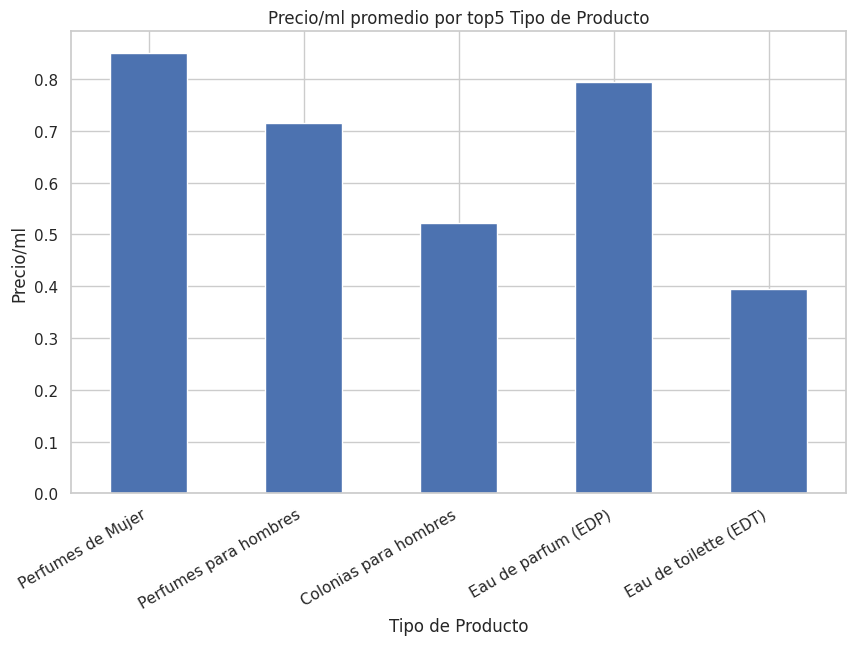

In [42]:
df['Precio/ml'] = pd.to_numeric(df['Precio/ml'], errors='coerce')

df = df.dropna(subset=['Precio/ml'])

df_tipo = df.groupby('Tipo')['Precio/ml'].mean()


top_5_tipos = df['Tipo'].value_counts().head(5).index
df_top_5 = df_tipo.loc[top_5_tipos]


df_top_5.plot(kind='bar', figsize=(10, 6))


plt.xlabel('Tipo de Producto')
plt.ylabel('Precio/ml')
plt.title('Precio/ml promedio por top5 Tipo de Producto')
plt.xticks(rotation=30, ha='right')

plt.show()

/tmp/ipykernel_49243/2132598050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating/5'] = pd.to_numeric(df['Rating/5'], errors='coerce')
/tmp/ipykernel_49243/2132598050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precio/ml'] = pd.to_numeric(df['Precio/ml'], errors='coerce')


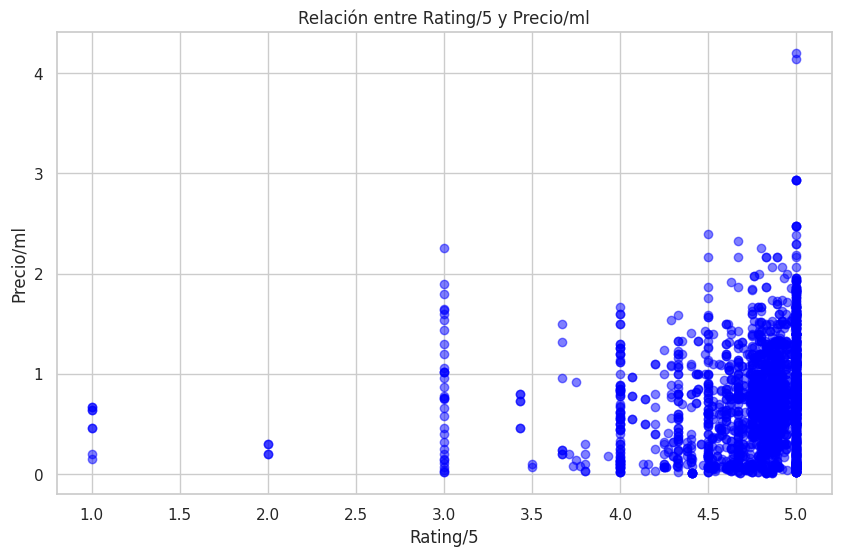

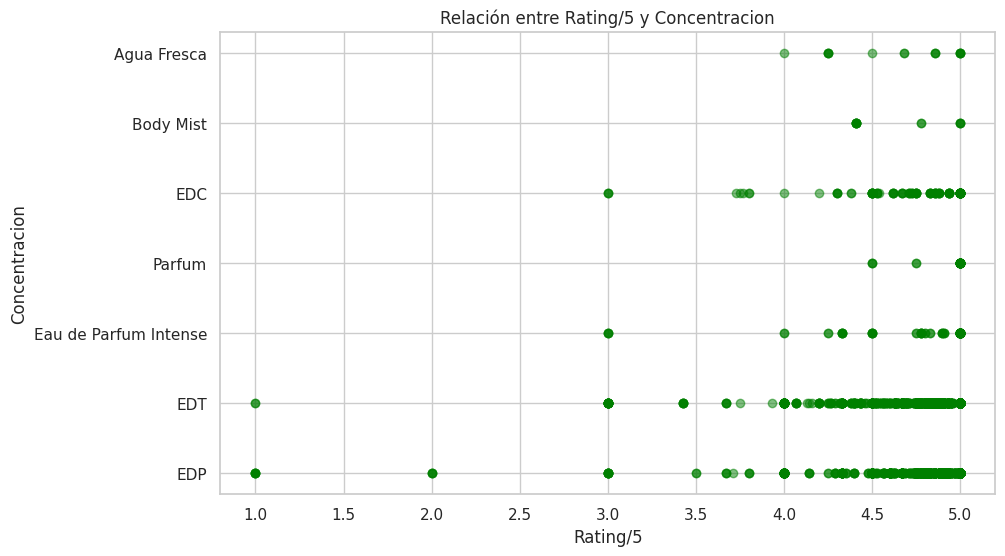

In [43]:
df['Rating/5'] = pd.to_numeric(df['Rating/5'], errors='coerce')
df['Precio/ml'] = pd.to_numeric(df['Precio/ml'], errors='coerce')

df = df.dropna(subset=['Rating/5', 'Precio/ml', 'Concentracion'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Rating/5'], df['Precio/ml'], c='blue', alpha=0.5)
plt.xlabel('Rating/5')
plt.ylabel('Precio/ml')
plt.title('Relación entre Rating/5 y Precio/ml')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Rating/5'], df['Concentracion'], c='green', alpha=0.5)
plt.xlabel('Rating/5')
plt.ylabel('Concentracion')
plt.title('Relación entre Rating/5 y Concentracion')
plt.show()